# A Data Driven Approach to European Ski Resorts - Pandas

[Previously](https://github.com/nembdev/python_portfolio/blob/main/Data%20Analysis%20Projects/European%20Ski%20Resorts(Manual)/A%20Data%20Driven%20Approach%20to%20European%20Ski%20Resorts.ipynb) we tried a tool/libraryless approach to Data Analysis. While manual analysis is tedious and limits our scope, its always a good idea to practice the fundamentals.

Now we will use the full might of Pandas, and Seaborn to go further in depth.

Pandas will handle our analysis, while Seaborn will help us create our Visuals. 


## Our Dataset

Our dataset features a sample of 376 european ski resorts provided by  ski-resort-stats.com, made availble through kaggle.

[Kaggle Dataset](https://www.kaggle.com/thomasnibb/european-ski-resorts)

[Data Source: Ski-resort-stats.com](Ski-resort-stats.com)

## Potential Avenues of Exploration

1. Top 5 most represented countries
2. Comparison of Price to Difficulty Options
3. Ratio of Lift Types 
4. Price to Elevation

These are just a few of the areas we could explore.

# Data Dictionary 

|Column Name| Description|
|-----------|-----------|
|**#**|Rownumber|
|**Resort**|The name at the ski & snowboard resort.
|**Country**| The name of the country in which the resort is located.|
|**HighestPoint**|The highest mountain point at the ski resort.|
|**LowestPoint**|The lowest possible point to ski at the ski resort.|
|**DayPassPriceAdult**| The price shows what it costs for 1 adult for 1 day in the main season in Euros €.|
|**BeginnerSlope**|The total amount of “beginner” slopes in kilometer at the resort. “Beginner slopes” contains “children”, “blue” and “green” slopes.|
|**IntermediateSlope**| The total amount of “intermediate” slopes in kilometer at the resort.“Intermediate slopes” contains “red” slopes. |
|**DifficultSlope**| The total amount of “difficult” slopes in kilometer at the resort.“Difficult slopes” contains “black”, “advanced” and”expert” slopes.| 
|**TotalSlope**| The sum of “beginner slopes” + “intermediate slopes” + “difficult slopes”|
|**Snowparks**| Does the resort have one or more snowparks, or not?|
|**NightSki**|Does the resort offer skiing on illuminated slopes?|
|**SurfaceLifts**| The amount of lifts in this category: T-bar, Sunkidslift, Rope lifts and people mower.|
|**ChairLifts**| The total amount of chairlifts.|
|**GondolaLifts**|The amount of lifts in this category: Gondola, Train lifts, Funicular, Combined gondola and chairlifts, Helicopter lifts, Snowcats and Aerial tramways.|
|**TotalLifts**| The sum of “surface lifts etc” + “gondola etc” + “chairlifts etc”|
|**LiftCapacity**| How many passengers can the lift system at the ski resort mowe in one hour?|
|**SnowCannons**| The total amount of snow cannons at the ski resort.|

# Library Imports

Here we import two industry standards: Pandas & Seaborn

In [1]:
# import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import pandas as pd
import seaborn as sns

# additional parameters
%matplotlib inline
style.use("ggplot")
plt.rcParams['figure.figsize'] = [10, 10]
font = {
        'size'   : 20}

plt.rc('font', **font)

sns.set_theme()

## Csv Import & Header Fixes

While importing our csv file, we can see that the first colum header is simply blank. It should be labeled as '#'.

By providing a arrray of header names, we can correct this on import. 

We load our csv and transform it into a Pandas DataFrame.

In [2]:
ski_data = pd.read_csv("European_Ski_Resorts.csv", names=['#', 'resort', 'country', 'highest_point', 'lowest_point',
       'daypass_price_adult', 'beginner_slope', 'Intermediate_slope',
       'difficult_slope', 'total_slope', 'snowparks', 'night_ski', 'surface_lifts',
       'chair_lifts', 'gondola_lifts', 'total_lifts', 'lift_capacity',
       'snow_cannons'],skiprows=1, index_col=0)

# Initial Exploration

In [3]:
ski_data

,resort,country,highest_point,lowest_point,daypass_price_adult,beginner_slope,Intermediate_slope,difficult_slope,total_slope,snowparks,night_ski,surface_lifts,chair_lifts,gondola_lifts,total_lifts,lift_capacity,snow_cannons
#,,,,,,,,,,,,,,,,,
1,Alpendorf (Ski amedé),Austria,1980,740,52,30,81,4,115,Yes,No,22,16,11,49,75398,600
2,Soldeu-Pas de la Casa/​Grau Roig/​El Tarter/​C...,Andorra,2640,1710,47,100,77,33,210,Yes,Yes,37,28,7,72,99017,1032
3,Oberau (Wildschönau),Austria,1130,900,30,1,0,1,2,No,No,2,0,0,2,1932,0
4,Dachstein West,Austria,1620,780,42,15,33,3,51,Yes,Yes,25,8,3,36,32938,163
5,Rosa Khutor,Southern Russia,2320,940,22,30,26,21,77,Yes,No,6,11,10,27,49228,450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372,Montgenèvre (Via Lattea),France,2749,1372,48,96,220,84,400,No,Yes,29,35,7,71,96433,0
373,Sauze d’Oulx (Via Lattea),Italy,2749,1372,48,96,220,84,400,No,Yes,29,35,7,71,96433,0
374,Gressoney - La-Trinite (Monterosa Ski),Italy,3275,1212,43,23,94,15,132,Yes,No,9,9,12,30,31984,655


### Data Types 

Here we can the the datatype for each column.

In comparison to our manual analysis, Pandas has automatically converted each column to the proper type.

In [4]:
print(ski_data.dtypes)
print("Shape: ", ski_data.shape)

resort                 object
country                object
highest_point           int64
lowest_point            int64
daypass_price_adult     int64
beginner_slope          int64
Intermediate_slope      int64
difficult_slope         int64
total_slope             int64
snowparks              object
night_ski              object
surface_lifts           int64
chair_lifts             int64
gondola_lifts           int64
total_lifts             int64
lift_capacity           int64
snow_cannons            int64
dtype: object
Shape:  (376, 17)


## Head & Tail

In [5]:
ski_data.head()

,resort,country,highest_point,lowest_point,daypass_price_adult,beginner_slope,Intermediate_slope,difficult_slope,total_slope,snowparks,night_ski,surface_lifts,chair_lifts,gondola_lifts,total_lifts,lift_capacity,snow_cannons
#,,,,,,,,,,,,,,,,,
1,Alpendorf (Ski amedé),Austria,1980,740,52,30,81,4,115,Yes,No,22,16,11,49,75398,600
2,Soldeu-Pas de la Casa/​Grau Roig/​El Tarter/​C...,Andorra,2640,1710,47,100,77,33,210,Yes,Yes,37,28,7,72,99017,1032
3,Oberau (Wildschönau),Austria,1130,900,30,1,0,1,2,No,No,2,0,0,2,1932,0
4,Dachstein West,Austria,1620,780,42,15,33,3,51,Yes,Yes,25,8,3,36,32938,163
5,Rosa Khutor,Southern Russia,2320,940,22,30,26,21,77,Yes,No,6,11,10,27,49228,450


In [6]:
ski_data.tail()

,resort,country,highest_point,lowest_point,daypass_price_adult,beginner_slope,Intermediate_slope,difficult_slope,total_slope,snowparks,night_ski,surface_lifts,chair_lifts,gondola_lifts,total_lifts,lift_capacity,snow_cannons
#,,,,,,,,,,,,,,,,,
372,Montgenèvre (Via Lattea),France,2749,1372,48,96,220,84,400,No,Yes,29,35,7,71,96433,0
373,Sauze d’Oulx (Via Lattea),Italy,2749,1372,48,96,220,84,400,No,Yes,29,35,7,71,96433,0
374,Gressoney - La-Trinite (Monterosa Ski),Italy,3275,1212,43,23,94,15,132,Yes,No,9,9,12,30,31984,655
375,Champoluc (Monterosa Ski),Italy,3275,1212,43,23,94,15,132,Yes,No,9,9,12,30,31984,655
376,Zauchensee,Austria,2188,1000,52,23,16,4,44,Yes,No,9,6,4,19,25988,113


## Extra info

* 2 main DataTypes
    * Ints and Strings(objects)
* No Missing Values - 376 non-null values
* 376 Rows x 18 Columns 

In [7]:
ski_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 376 entries, 1 to 376
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   resort               376 non-null    object
 1   country              376 non-null    object
 2   highest_point        376 non-null    int64 
 3   lowest_point         376 non-null    int64 
 4   daypass_price_adult  376 non-null    int64 
 5   beginner_slope       376 non-null    int64 
 6   Intermediate_slope   376 non-null    int64 
 7   difficult_slope      376 non-null    int64 
 8   total_slope          376 non-null    int64 
 9   snowparks            376 non-null    object
 10  night_ski            376 non-null    object
 11  surface_lifts        376 non-null    int64 
 12  chair_lifts          376 non-null    int64 
 13  gondola_lifts        376 non-null    int64 
 14  total_lifts          376 non-null    int64 
 15  lift_capacity        376 non-null    int64 
 16  snow_can

In [8]:
ski_data.describe()

,highest_point,lowest_point,daypass_price_adult,beginner_slope,Intermediate_slope,difficult_slope,total_slope,surface_lifts,chair_lifts,gondola_lifts,total_lifts,lift_capacity,snow_cannons
count,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000
mean,2051.688830,1055.098404,40.779255,35.869681,38.348404,11.776596,86.257979,13.662234,9.340426,3.954787,26.957447,34727.244681,218.361702
std,776.719908,423.604310,12.474259,53.719832,49.691136,17.785780,113.740218,14.438661,12.595282,6.565411,31.038957,45955.042689,406.903529
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1550.000000,779.250000,34.000000,8.000000,9.000000,2.000000,25.000000,5.000000,2.000000,0.000000,10.000000,10642.500000,0.000000
50%,2104.000000,1050.000000,42.000000,19.000000,22.000000,5.000000,48.000000,9.000000,5.000000,2.000000,17.000000,19031.500000,54.000000
75%,2567.500000,1350.000000,49.000000,40.000000,42.250000,13.000000,100.000000,17.000000,10.000000,5.000000,29.250000,36555.500000,252.000000
max,3899.000000,2180.000000,81.000000,312.000000,239.000000,103.000000,600.000000,89.000000,74.000000,40.000000,174.000000,252280.000000,2383.000000


## Basic Stats

Using our descibe method we can already extract a few bits of info, such as **means, mins, and averages**.

For example, the **mean price** of an **Adult Day Pass** is about **40 Euros**.

While useful, this information will really shine when used in conjunction with visuals.

# What countrys are we working with?

In [9]:
ski_data['country'].unique()

array(['Austria', 'Andorra', 'Southern Russia', 'Poland', 'Bulgaria',
       'Bosnia and Herzegovina', 'Slovenia', 'France', 'Switzerland',
       'Germany', 'Spain', 'Italy', 'Sweden', 'Norway', 'Ukraine',
       'Finland', 'Serbia', 'Slovakia', 'Siberia', 'Czech Republic',
       'Romania', 'Greece', 'United Kingdom', 'Liechtenstein',
       'Lithuania', 'Denmark', 'Netherlands'], dtype=object)

# Average Adult Day Pass Price per Country

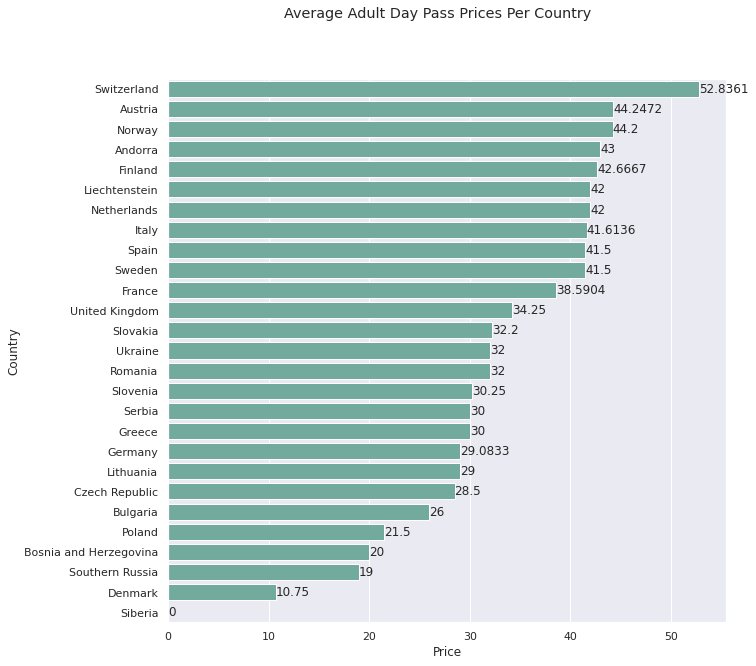

In [59]:
# dict for our results
avg_price_by_country = {}

# list of all unique countries in our data 
countries = ski_data['country'].unique()

#loop through each in our list 
for country in countries:
    # if the rows matches a country in our list
    # grabs all matching rows
    country_row = ski_data[ski_data["country"] == country]
    
    # calculate the the mean
    mean = country_row['daypass_price_adult'].mean()
    
    # add the min to our results
    avg_price_by_country[country] = mean

# sorted price
avg_price_by_country = sorted(avg_price_by_country.items(), key=lambda x:x[1], reverse=True)

# convert and verify
price_country = pd.DataFrame.from_dict(avg_price_by_country)
price_country.columns = ["Country", "Price"]
# price_country


# seaborn visual
# container, plot
fig, ax = plt.subplots()
# title
fig.suptitle("Average Adult Day Pass Prices Per Country")

# bar graph
ax = sns.barplot(x=price_country["Price"],
            y=price_country["Country"],
            data=price_country,
            color='#69b3a2')
# add values
for i in ax.containers:
    ax.bar_label(i,)